In [66]:
import nflreadpy as nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import joblib
from pathlib import Path

# PROJECT_ROOT = Path.cwd().parents[1]
# sys.path.append(str(PROJECT_ROOT))
# from src import load

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 1) load.py

# 2) preprocessing.py

In [67]:
# import play by play data from /data/
pbp_filepath = '../../data/raw_pbp_21_25.csv'

try:
    df = pd.read_csv(pbp_filepath)
except Exception as e:
    print(f'Error: {e}')

# df = load.load_data()

/var/folders/xn/wkvzqh111pj3tm8j06w408240000gn/T/ipykernel_36316/1313264090.py:5: DtypeWarning: Columns (46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,219,220,221,223,225,227,234,235,236,237,238,239,244,245,246,254,255,256,261,263,264,284,285,303,333) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pbp_filepath)


### What are we working with?
- Let's take a general look at the features
- What do we need for our model?

In [68]:
df.head(1)

,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,

In [69]:
# features we have to choose from
print(f'Number of features: {len(df.columns)}')
for col in df.columns:
    print(col)

Number of features: 373
Unnamed: 0
play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa


In [70]:
# general feature trim to remove unrelated features (e.g. probabilities, post play features, etc)
# before actual feature selection
cols_to_keep = [
    "yardline_100", # Numeric distance in the number of yards from the opponent's endzone for the posteam.
    "posteam", # String abbreviation for the team with possession.
    "quarter_seconds_remaining",
    "half_seconds_remaining",
    "game_seconds_remaining",
    "game_half", # String indicating which half the play is in, either Half1, Half2, or Overtime.
    "drive", # Numeric drive number in the game.
    "qtr", # Quarter of the game (5 is overtime).
    "down", 
    "goal_to_go", # Binary indicator for whether or not the posteam is in a goal down situation.
    "time", # Time at start of play provided in string format as minutes:seconds remaining in the quarter.
    "ydstogo",
    "play_type",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining",
    "posteam_score",
    "defteam_score",
    "score_differential", # Score differential between the posteam and defteam at the start of the play.
    "ep", # estimated expected points with respect to the possession team for the given play.
    "posteam_type", # String indicating whether the posteam team is home or away
    "wp", # Estimated win probabiity for the posteam given the current situation at the start of the given play
    "season"
]

df = df[cols_to_keep]

In [71]:
print(f'Rows in dataframe: {len(df)}\n')
print(f'{df.info()}')

Rows in dataframe: 242329

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242329 entries, 0 to 242328
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   yardline_100                225048 non-null  float64
 1   posteam                     229081 non-null  object 
 2   quarter_seconds_remaining   242311 non-null  float64
 3   half_seconds_remaining      242311 non-null  float64
 4   game_seconds_remaining      242311 non-null  float64
 5   game_half                   242329 non-null  object 
 6   drive                       239562 non-null  float64
 7   qtr                         242329 non-null  float64
 8   down                        203520 non-null  float64
 9   goal_to_go                  242329 non-null  int64  
 10  time                        242311 non-null  object 
 11  ydstogo                     242329 non-null  float64
 12  play_type                   235199 non-null  

In [72]:
print(f'Value Counts for play_type:\n{df.play_type.value_counts()}')

# ensure our data only contains passing and run plays
print('\nTrimming to only contain pass, run, punt, and field goal plays...')
df = df[df['play_type'].isin(['pass', 'run', 'punt', 'field_goal'])]


Value Counts for play_type:
pass           99828
run            73063
no_play        23082
kickoff        14170
punt           10764
extra_point     6321
field_goal      5469
qb_kneel        2150
qb_spike         352
Name: play_type, dtype: int64

Trimming to only contain pass, run, punt, and field goal plays...


In [73]:
# what features contain null values?
print('\nNull Values:')
print(df.isnull().sum())


Null Values:
yardline_100                    0
posteam                         0
quarter_seconds_remaining       0
half_seconds_remaining          0
game_seconds_remaining          0
game_half                       0
drive                          29
qtr                             0
down                          673
goal_to_go                      0
time                            0
ydstogo                         0
play_type                       0
posteam_timeouts_remaining      0
defteam_timeouts_remaining      0
posteam_score                   0
defteam_score                   0
score_differential              0
ep                              0
posteam_type                    0
wp                              0
season                          0
dtype: int64


In [74]:
# plays are extremely unique due to having 100+ features
# we will still check for duplicates incase the api being used has errors.
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 217


/var/folders/xn/wkvzqh111pj3tm8j06w408240000gn/T/ipykernel_36316/3408043122.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr() > 0.7, cbar=False, annot=True)


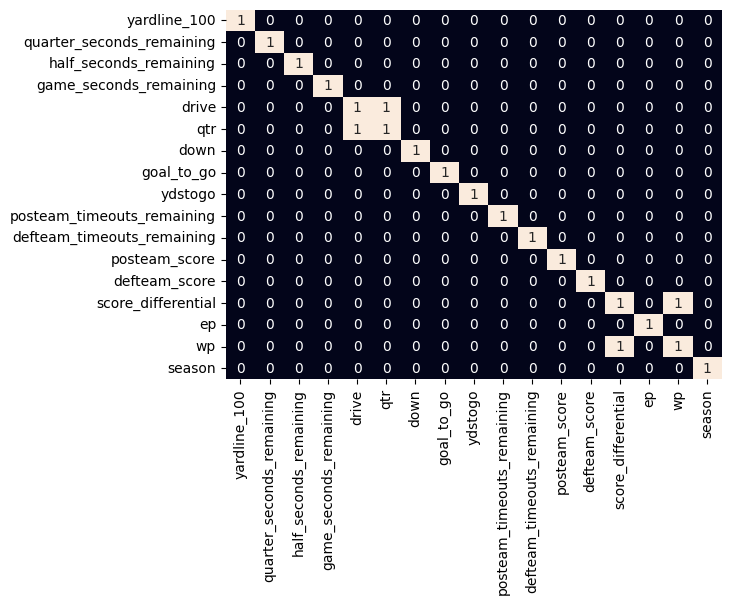

In [75]:
# correlation matrix to check for highly correlated features
sb.heatmap(df.corr() > 0.7, cbar=False, annot=True)
plt.show()

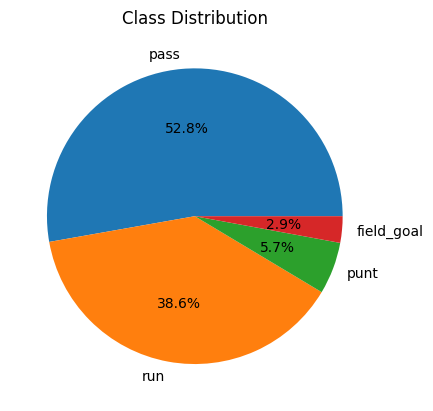

In [76]:
play_types_counts = df.play_type.value_counts()
plt.pie(play_types_counts.values, labels=play_types_counts.index.values, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

### Data Cleaning
- Dropping rows containing nulls
- Removing duplicates
- Removing outliers (garbage time)
- Renaming columns for clarity

In [77]:
# dropping null rows
df_cleaned = df.dropna(axis=0)

# dropping duplicates
df_cleaned = df_cleaned.drop_duplicates()


In [78]:
# removing garbage time
# teams get desperate during this time and call plays they wouldn't usually call
# how should we define it?

garbage_time = 2

if garbage_time == 0:

    ## option 1 manually define it
    df_cleaned['garbage_time'] = (
        # final 2 min of 1st half
        ((df['qtr'] == 2) & (df['half_seconds_remaining'] <= 120)) |

        # trailing in the 4th qtr
        ((df['qtr'] == 4) & (df['score_differential'] > 0)) |

        # down by 21+ at any time
        (df['score_differential'] < -21) | 

        # up by 21+ in the 2nd hald
        ((df['qtr'] >= 3) & (df['score_differential'] >= 21))
    )

    df_cleaned = df_cleaned.loc[~df_cleaned['garbage_time']].reset_index(drop=True)
elif garbage_time == 1:

    ## option 2
    # where win probability is btw 0.1 and 0.9
    df_cleaned = df_cleaned[((df['wp'] > 0.1) & (df['wp'] < 0.9))]

    # let's visual our changes to win probability (wp)
    plt.hist(df_cleaned.wp, bins=50)
    plt.ylabel('Play Count')
    plt.xlabel('Win Probability')
    plt.show()
else:

    ## option 3
    # 4th quarter blow outs (> 21 pt differential)
    mask_garbage = (df_cleaned['qtr'] == 4) & (df_cleaned['score_differential'].abs() > 21)
    df_cleaned = df_cleaned[~mask_garbage]


### Feature Engineering
- Derive new features
- One-hot/ multi-hot encoding categorical variables

In [79]:
# feature engineering
df_cleaned['down'] = df_cleaned['down'].astype('category')
df_cleaned['qtr'] = df_cleaned['qtr'].astype('category')

In [80]:
print(f'Length before cleaning {len(df)}')
print(f'Length after cleaning {len(df_cleaned)}')

Length before cleaning 189124
Length after cleaning 182341


### Feature Selection
There will be two sets of features for two (+1) different uses

1) The first set will be to determine whether a not a team will go for it on fourth down.

2) The second set will be used to determine whether a team will run or pass.

Note: An additional set will be used for a real world analysis of NFL play to determine how effective the model is on real time data.

#### Data Splitting

In [81]:
df_cleaned = df_cleaned.reset_index(drop=True)

# 1) define the feature lists
features_decision = [
    'yardline_100', 'ydstogo', 'score_differential', 
    'game_seconds_remaining', 'posteam_timeouts_remaining'
]

features_play = [
    'down', 'ydstogo', 'yardline_100', 'score_differential', 
    'game_seconds_remaining', 'posteam_timeouts_remaining', 'qtr'
]


# 2) split the dataset by time 
train_master = df_cleaned[df_cleaned['season'] < 2024].copy()
test_master = df_cleaned[df_cleaned['season'] == 2024].copy()


# 3) split by model
# model 1 split (decision maker)
# target -> 0 = Kick (punt/fg), 1 = Go (pass/run)

# training data for model 1
train_decision = train_master[train_master['down'] == 4].copy()
train_decision['target_go'] = train_decision['play_type'].isin(['pass', 'run']).astype(int)

# test data for model 1
test_decision = test_master[test_master['down'] == 4].copy()
test_decision['target_go'] = test_decision['play_type'].isin(['pass', 'run']).astype(int)

# model 2 split (play prediction)
# target -> 0 = run, 1 = pass

# training data for model 2
train_play = train_master[train_master['play_type'].isin(['run', 'pass'])].copy()
train_play['target_pass'] = (train_play['play_type'] == 'pass').astype(int)

# test data for model 2
test_play = test_master[test_master['play_type'].isin(['run', 'pass'])].copy()
test_play['target_pass'] = (test_play['play_type'] == 'pass').astype(int)


# 3) train.py

In [82]:
import pandas as pd
import pickle
import numpy
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score, classification_report


# Model Training
- Gradient Boosting (LightGBM)
    - Decision Maker
    - Play Prediction

### Model 1 - Decision Maker
- Are they going for it on 4th or are they kicking (punt/fg)?

In [83]:
# model 1, go for it or punt?
# 0 = punt/fg, 1 = GO (run/pass) -> go to model 2

# define train/test splits
X_train_decision = train_decision[features_decision]
y_train_decision = train_decision['target_go']
X_test_decision = test_decision[features_decision]
y_test_decision = test_decision['target_go']

print(f"Model 1 (Decision) Train Shape: {X_train_decision.shape}")
print(f"Model 1 (Decision) Test Shape:  {X_test_decision.shape}")

# use lgb dataset
lgb_train_decision = lgb.Dataset(X_train_decision, label=y_train_decision)
lgb_test_decision = lgb.Dataset(X_test_decision, label=y_test_decision, reference=lgb_train_decision)

print("-" * 30)

# setup a time series split
tscv = TimeSeriesSplit(n_splits=3)

# base model -> unbalanced since going on 4th is rare
lgb_decision = lgb.LGBMClassifier(random_state=46, is_unbalance=True, verbose=-1)

param_grid_decision = {
    'n_estimators': [650],
    'learning_rate': [0.1],
    'max_depth': [5],
    'num_leaves': [15] # keep < 2^ max_depth
}

grid_decision = GridSearchCV(
    estimator=lgb_decision,
    param_grid=param_grid_decision,
    cv=tscv,
    scoring='f1', # imbalanced set, focus on f1 as accuracy can be misleading
    verbose=1,
    n_jobs=-1
)

print('Training model w/ Grid Search...')
grid_decision.fit(X_train_decision, y_train_decision)
print('Training complete!')

print(f'Best Parameters for Decision Model:\n{grid_decision.best_params_}')

best_model_decision = grid_decision.best_estimator_

print('Making predictions using best model...')
y_pred_decision = best_model_decision.predict(X_test_decision)
print('Predictions made!')

Model 1 (Decision) Train Shape: (11889, 5)
Model 1 (Decision) Test Shape:  (3851, 5)
------------------------------
Training model w/ Grid Search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training complete!
Best Parameters for Decision Model:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 650, 'num_leaves': 15}
Making predictions using best model...
Predictions made!


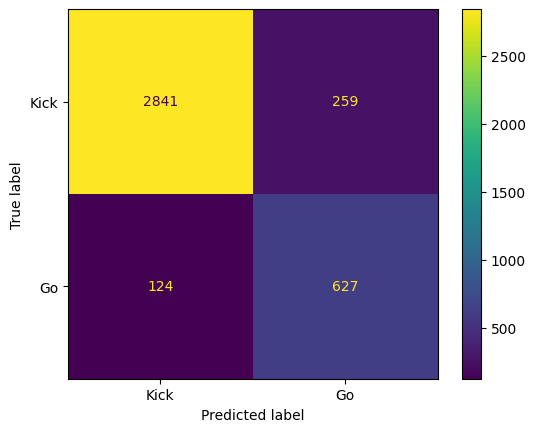

Model 1's Accuracy: 0.901
Model 1's Precision: 0.708
Model 1's Recall: 0.835
Model 1's F1 Score: 0.766
Exporting model...
Decision model was successfully saved to ../../models/decision_model.pkl


In [84]:
# evaluations for model 1

cm_decision = confusion_matrix(y_test_decision, y_pred_decision)
 
cm_visual_decision = ConfusionMatrixDisplay(confusion_matrix=cm_decision, display_labels=['Kick', 'Go'])
cm_visual_decision.plot()
plt.show()

# accuracy (TP & TN)
print(f'Model 1\'s Accuracy: {accuracy_score(y_test_decision, y_pred_decision):.3f}')

# TPs of all positive predictions (of all predicted positives, how many were actually positive)
print(f'Model 1\'s Precision: {precision_score(y_test_decision, y_pred_decision):.3f}')

# TPs of all acutal positives (of all actual positives, how well did we identify them)
print(f'Model 1\'s Recall: {recall_score(y_test_decision, y_pred_decision):.3f}')

# TPs of all acutal positives (of all actual positives, how well did we identify them)
print(f'Model 1\'s F1 Score: {f1_score(y_test_decision, y_pred_decision):.3f}')

print('Exporting model...')
model_fp_decision = '../../models/decision_model.pkl'

joblib.dump(best_model_decision, model_fp_decision)

print(f'Decision model was successfully saved to {model_fp_decision}')


### Model 2 - Play Prediction
- Are they rushing or passing?

In [85]:
# define the test and train sets
X_train_play = train_play[features_play]
y_train_play = train_play['target_pass']
X_test_play = test_play[features_play]
y_test_play = test_play['target_pass']

# ensure same shapes
print(f"Model 2 (Play Analysis) Train Shape: {X_train_decision.shape}")
print(f"Model 2 (Play Analysis) Test Shape:  {X_test_decision.shape}")

# use lgb dataset
lgb_train_play = lgb.Dataset(X_train_play, label=y_train_play)
lgb_test_play = lgb.Dataset(X_test_play, label=y_test_play, reference=lgb_train_play)
print("-" * 30)

lgb_play = lgb.LGBMClassifier(random_state=46, verbose=-1)

param_grid_play = {
    'n_estimators': [300],
    'learning_rate': [0.03],
    'max_depth': [8],
    'num_leaves': [30]
}

grid_play = GridSearchCV(
    estimator=lgb_play,
    param_grid=param_grid_play,
    cv=tscv,
    scoring='neg_log_loss', # we want to know probability calibration
    verbose=1,
    n_jobs=-1
)

print('Training model w/ Grid Search...')
grid_play.fit(X_train_play, y_train_play)
print('Training complete!')

print(f'Best Parameters for Play Prediction Model:\n{grid_play.best_params_}')

best_model_play = grid_play.best_estimator_

print('Making predictions using best model...')
y_pred_prob_play =  best_model_play.predict(X_test_play)
y_pred_play = (y_pred_prob_play > 0.5).astype(int)
print('Predictions made!')

Model 2 (Play Analysis) Train Shape: (11889, 5)
Model 2 (Play Analysis) Test Shape:  (3851, 5)
------------------------------
Training model w/ Grid Search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training complete!
Best Parameters for Play Prediction Model:
{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 300, 'num_leaves': 30}
Making predictions using best model...
Predictions made!


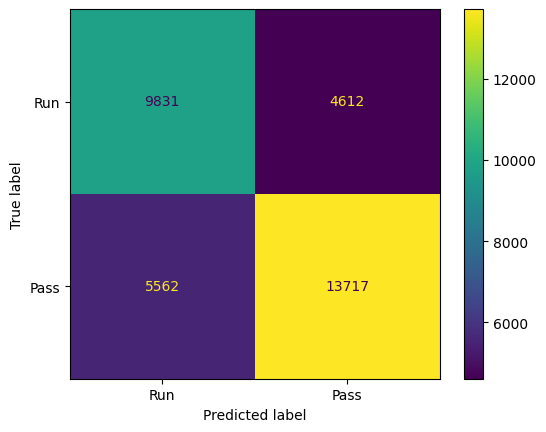

Model's Accuracy: 0.698
Model's Precision: 0.748
Model's Recall: 0.711
Model's F1 Score: 0.729
Dummy Accuracy (Always guessing Pass): 0.572
Exporting model...
Play prediction model was successfully saved to ../../models/play_model.pkl


In [86]:
# evaluations

cm_play = confusion_matrix(y_test_play, y_pred_play)

cm_visual_play = ConfusionMatrixDisplay(confusion_matrix=cm_play, display_labels=['Run', 'Pass'])
cm_visual_play.plot()
plt.show()

# accuracy (TP & TN)
print(f'Model\'s Accuracy: {accuracy_score(y_test_play, y_pred_play):.3f}')

# TPs of all positive predictions (of all predicted positives, how many were actually positive)
print(f'Model\'s Precision: {precision_score(y_test_play, y_pred_play):.3f}')

# TPs of all acutal positives (of all actual positives, how well did we identify them)
print(f'Model\'s Recall: {recall_score(y_test_play, y_pred_play):.3f}')

# TPs of all acutal positives (of all actual positives, how well did we identify them)
print(f'Model\'s F1 Score: {f1_score(y_test_play, y_pred_play):.3f}')

# dumb model
baseline_acc_play = y_test_play.mean()
print(f"Dummy Accuracy (Always guessing Pass): {baseline_acc_play:.3f}")

print('Exporting model...')
model_fp_play = '../../models/play_model.pkl'

joblib.dump(best_model_play, model_fp_play)

print(f'Play prediction model was successfully saved to {model_fp_play}')